In [132]:
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [127]:
def getColor(value):
    if value > 800:
        return 'tab:red'   # nuclear
    elif (100 < value) and (value <= 800):
        return 'tab:blue'  # hydro
    elif (80 < value) and (value <= 100):
        return 'tab:grey' # natural gas
    else:
        return 'tab:green' # off shore wind or solar

In [128]:
his_path = 'sim/2030/logs/his'
data_files = [f for f in os.listdir(his_path) if os.path.isfile(os.path.join(his_path, f))]
data_files = [f for f in data_files if '.bak' not in f]
data_files = [f for f in data_files if '.DS' not in f]
data_files

print(data_files)
RES_CONSUMP = 0.00131 # MW

df = pd.DataFrame()
for f in data_files:
    df = pd.concat([df, pd.read_csv(os.path.join(his_path, f))], ignore_index=True)
print("results from: {} generators".format(len(df.id.unique())))

df.time = pd.to_datetime(df.time)

['host_0_tracker_0.csv', 'host_0_tracker_1.csv']
results from: 325 generators


In [141]:
mode = df.groupby('ts').size().mode()[0]
mode

325

In [151]:
tss = df.groupby('ts').size()
print('min',tss[tss == mode].index.min())
print('max',tss[tss == mode].index.max())

min 1
max 135


plot_from ts = 135


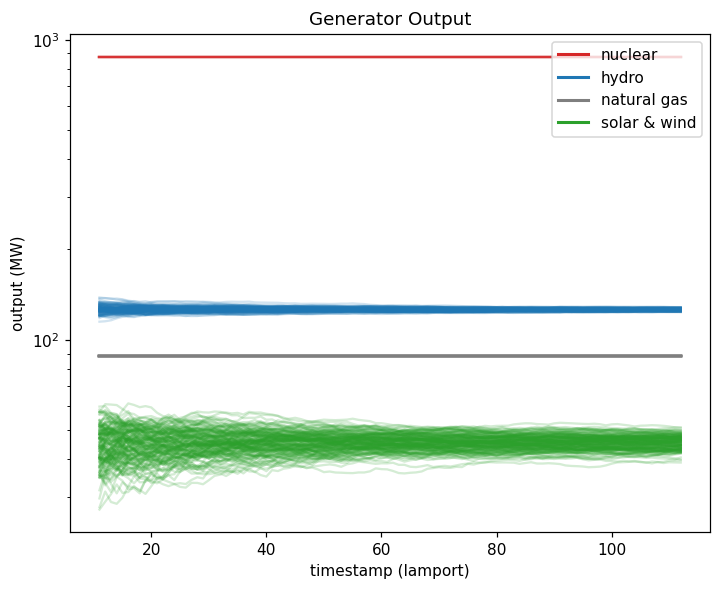

In [157]:
plot_from = df.ts.value_counts().value_counts().iloc[0]
print('plot_from ts = {}'.format(plot_from))

SETTLE_TIME = 10
_df = df[(df.ts > SETTLE_TIME) & (df.ts <= 112)]
index = _df.ts.unique()
index # time stamps

fig, ax = plt.subplots(figsize=(7.5,6), dpi=110)

for gen_id in df.id.unique():
    mean = _df[_df['id'] == gen_id].output.mean()
    plt.plot(index, _df[_df['id'] == gen_id].output, linestyle='solid', color=getColor(mean), alpha = .2)
#     plt.plot(index, _df[_df['id'] == gen_id].demand, linestyle='dashed',
#              linewidth=1, color=plt.gca().lines[-1].get_color())
    
# ax.legend(df.id.unique(), fontsize=6, loc='center right', bbox_to_anchor=(1.0, 0.5))

legend_lines = [Line2D([0], [0], color='tab:red', lw=2),
                Line2D([0], [0], color='tab:blue', lw=2),
                Line2D([0], [0], color='tab:grey', lw=2),
                Line2D([0], [0], color='tab:green', lw=2)]

plt.legend(legend_lines, ['nuclear', 'hydro', 'natural gas','solar & wind'])

plt.yscale('log')
ax.set_title('Generator Output')
ax.set_xlabel("timestamp (lamport)")
ax.set_ylabel("output (MW)")
    
plt.show()

In [166]:
window = df[(df.time > '2022-12-15 22:22:00') & (df.time < '2022-12-15 22:22:02.5')]
window

,id,ts,host,tracker,output,demand,net_cap,percent_use,time
6669,-1393435406,28,0,0,46.898725,19.307109,27.591616,0.588323,2022-12-15 22:22:00.015006
6670,-1719963416,55,0,0,877.500000,777.976390,99.523610,0.113417,2022-12-15 22:22:00.020238
6671,-682478166,36,0,0,37.467886,26.677889,10.789997,0.287980,2022-12-15 22:22:00.020807
6672,-433234966,41,0,0,88.200000,77.980200,10.219800,0.115871,2022-12-15 22:22:00.031480
6673,-1415370035,46,0,0,125.781805,112.738135,13.043670,0.103701,2022-12-15 22:22:00.035009
...,...,...,...,...,...,...,...,...,...
30478,376264610,34,0,1,41.792711,14.394359,27.398352,0.655577,2022-12-15 22:22:02.400100
30479,1255363007,34,0,1,41.151863,35.349299,5.802563,0.141004,2022-12-15 22:22:02.438138
30480,1858683334,28,0,1,45.188195,28.625357,16.562838,0.366530,2022-12-15 22:22:02.460740
30481,2027368132,26,0,1,43.662032,38.631387,5.030646,0.115218,2022-12-15 22:22:02.472076


In [ ]:
# am able to 

In [169]:
window.id.value_counts()

-1393435406    2
 1581313792    2
-657413936     2
-786468329     2
-1295756898    2
              ..
-180808273     1
-267922062     1
-65717246      1
-1837138915    1
 260283264     1
Name: id, Length: 325, dtype: int64

In [115]:
_df.ts.max()

60

In [116]:
_df.ts.min()

1

In [76]:
x = _df.groupby('ts').get_group(11)
x

,id,ts,host,tracker,output,demand,net_cap,percent_use,time
440,-1942765353,11,0,0,88.200000,79.379959,8.820041,0.100000,2022-12-15 21:55:40.824687
448,-1501991681,11,0,0,57.688189,52.676320,5.011869,0.086879,2022-12-15 21:55:41.115572
462,-894238595,11,0,0,46.372397,31.416335,14.956062,0.322521,2022-12-15 21:55:41.352501
463,-180490517,11,0,0,126.802280,110.981474,15.820806,0.124768,2022-12-15 21:55:41.361675
468,-23457213,11,0,0,123.650234,109.717690,13.932544,0.112677,2022-12-15 21:55:41.385231
...,...,...,...,...,...,...,...,...,...
1284,1447796223,11,0,1,877.500000,766.266300,111.233700,0.126762,2022-12-15 21:55:43.390891
1289,1211618167,11,0,1,54.636563,52.834051,1.802512,0.032991,2022-12-15 21:55:43.610670
1297,435167652,11,0,1,41.426499,31.580596,9.845904,0.237672,2022-12-15 21:55:43.688094
1304,577463388,11,0,1,34.482916,30.874369,3.608547,0.104647,2022-12-15 21:55:43.830910


In [77]:
x.time.max() - x.time.min()

Timedelta('0 days 00:00:03.247542')

In [78]:
_df.groupby('ts').get_group(11)

,id,ts,host,tracker,output,demand,net_cap,percent_use,time
440,-1942765353,11,0,0,88.200000,79.379959,8.820041,0.100000,2022-12-15 21:55:40.824687
448,-1501991681,11,0,0,57.688189,52.676320,5.011869,0.086879,2022-12-15 21:55:41.115572
462,-894238595,11,0,0,46.372397,31.416335,14.956062,0.322521,2022-12-15 21:55:41.352501
463,-180490517,11,0,0,126.802280,110.981474,15.820806,0.124768,2022-12-15 21:55:41.361675
468,-23457213,11,0,0,123.650234,109.717690,13.932544,0.112677,2022-12-15 21:55:41.385231
...,...,...,...,...,...,...,...,...,...
1284,1447796223,11,0,1,877.500000,766.266300,111.233700,0.126762,2022-12-15 21:55:43.390891
1289,1211618167,11,0,1,54.636563,52.834051,1.802512,0.032991,2022-12-15 21:55:43.610670
1297,435167652,11,0,1,41.426499,31.580596,9.845904,0.237672,2022-12-15 21:55:43.688094
1304,577463388,11,0,1,34.482916,30.874369,3.608547,0.104647,2022-12-15 21:55:43.830910


Find instances where capacity was negative

find time stamps where net_cap was negative.

In [ ]:
df

In [ ]:
# deficit = t[t.percent_use < 0.15]
# surplus = t[t.percent_use > 0]

# load_to_shift = deficit.net_cap.sum()
# print('need to shift {:.1f} MW'.format(load_to_shift))
# print('{:,} homes'.format(np.ceil(load_to_shift / RES_CONSUMP).astype(int)))

# available_capacity = surplus.net_cap.sum()
# print('able to shift {:.1f} MW'.format(available_capacity))

In [ ]:
# ts = 5
# net_system_cap = supply.net_cap.sum() - deficit.net_cap.sum()
# print("at ts {} available capacity was {:.3f} MW".format(str(ts).rjust(3,"0"), net_system_cap))

Running the below code reveals that each tracker always contains spare capacity

# Changed net_cap_percentto percent_use

In [ ]:
result = pd.DataFrame()

In [ ]:
df.columns = ['id', 'ts', 'host', 'tracker', 'output', 'demand', 'net_cap', 'percent_use']
df.index.name = 'e_id'
df.output = np.round(df.output, 3)
safety_threshold = 0.1
for tracker in range(df.tracker.max() + 1):
    print("Tracker {}".format(tracker))
    print("===========")
    for ts in range(df.ts.max())[-3:]:
        _ = df[(df.ts == ts) & (df.tracker == tracker)].copy()
        _['s_demand'] = np.round((_.output * (1 - safety_threshold)),2)
        _['s_net_cap'] =  _['s_demand'] - _['demand']
        deficit = _[_['percent_use'] < safety_threshold].copy()
        surplus = _[_['percent_use'] > safety_threshold].copy()
        net_system_cap = surplus.net_cap.sum() - deficit.net_cap.sum()
        total_safe_capacity = (surplus.output * (1 - safety_threshold) - surplus.demand).sum()

        print("=" * 36)
        print("at ts = {}".format(str(ts).rjust(2,"0")))
#         print(_[['output','demand','s_demand','net_cap','s_net_cap','percent_use']])
        print("------------------------------------")
        print("   - total capacity was  {:.2f} MW".format(_.output.sum()))
        print("   - total demand was    {:.2f} MW".format(_.demand.sum()))  
        print("                         ---------")
        print("   - spare capacity was  {:.2f} MW    // ignoring safety factor".format(net_system_cap))
        print("------------------------------------")
        print('   - able to shift       {} MW    // considering safety factor'.format('{:.1f}'.format(total_safe_capacity).rjust(6)))
        print("------------------------------------")
        safe_load   = (_.output * (1 - safety_threshold)).sum()
        unsafe_load = (deficit.output * (1 - safety_threshold) - deficit.demand).sum()
#         load_to_shift = safe_load - deficit.demand.sum()
        print("   - 'Safe Load' was     {:.2f} MW    // considering safety factor".format(safe_load))

        if unsafe_load < 0:
        # else deficit.output - deficit.demand = (-) load must be shifted
            print("   - 'Unsafe Load' was   {} MW    // need to shift".format('({:.1f})'.format(abs(unsafe_load)).rjust(6, " ")))
            homes_to_shift = np.ceil(np.abs(unsafe_load) / RES_CONSUMP).astype(int)
            surplus['s_net_cap'] = (surplus.output * (1 - safety_threshold)) - surplus.demand
            deficit['s_net_cap'] = (deficit.output * (1 - safety_threshold)) - deficit.demand
            surplus['share_of_net'] =  surplus['s_net_cap'] / surplus['s_net_cap'].sum()
            deficit['share_of_net'] =  deficit['s_net_cap'] / deficit['s_net_cap'].sum()
            surplus['new_load'] = -1 * np.round((surplus['share_of_net'] * unsafe_load) / RES_CONSUMP) * RES_CONSUMP
            deficit['new_load'] = -1 * surplus['new_load'].sum() * deficit['share_of_net']
            s = surplus['percent_use'].sort_values(ascending=True)

            print('   - Load shifting to   {} homes // {:,.1f} MW shifted'.format('{:,}'.format(homes_to_shift).rjust(7),
                                                                                  abs(surplus.new_load.sum()),abs(surplus.new_load.sum())))

            if total_safe_capacity > np.abs(unsafe_load):
                print("------------------------------------")
                print("Success – load safely shifted")
            else:
                print("------------------------------------")
                print("FAILURE – load NOT shifted")
            # 38 char
#             print('{}// {:,.1f} MW shifted'.format("".rjust(38), ))
            if False:
                print("------------------------------------")
                print("All Data")
                _ = pd.concat([surplus,deficit])[['output','demand','net_cap','s_net_cap','share_of_net','new_load']]
                print(df)
        else:
            # if   deficit.output - deficit.demand = (+) then no load need be shifted
            print("   - 'Unsafe Load' was        0 MW    ".format(unsafe_load)) # // {:.2f}
            print("------------------------------------")
            print("NO LOAD TO SHIFT".center(36))
        if ts == 5:
            result = _
        print("=" * 36)

In [ ]:
result

In [ ]:
0.173483 + 0.118354  + 0.118354  + 0.118354  + 0.0035494 + 0.0257457 + 0.0874174 + 0.0278453 + 0.0400366 + 0.118305  +  0.168554  +  1